Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


Create working directory and download DCUnet programs and model files 

In [28]:
!mkdir -p /content/drive/MyDrive/Learning/EIE558
%cd /content/drive/MyDrive/Learning/EIE558
!if [ ! -f DCUnet.tgz ]; then wget http://bioinfo.eie.polyu.edu.hk/download/EIE558/DCUnet/DCUnet.tgz; fi
!tar zxf DCUnet.tgz
!rm -f *.tgz*

/content/drive/MyDrive/Learning/EIE558


In [35]:
%cd /content/drive/MyDrive/Learning/EIE558/DCUnet
!ls

/content/drive/MyDrive/Learning/EIE558/DCUnet
audio  dc-unet.py  models	SpeechDataset.py
data   model.py    __pycache__	stft-istft-example.py


Create data/ directory and download training and test data

In [37]:
!mkdir -p /content/drive/MyDrive/Learning/EIE558/DCUnet/data
%cd /content/drive/MyDrive/Learning/EIE558/DCUnet/data
!ls

/content/drive/MyDrive/Learning/EIE558/DCUnet/data


In [60]:
%%shell
dir=clean_testset_wav 
if [ ! -d $dir ]; then
  echo "Directory $dir does not exist. Downloading ${dir}.zip"
  wget http://bioinfo.eie.polyu.edu.hk/download/clean_noisy_para_speech/${dir}.zip;
  unzip -o ${dir}.zip;
  rm -f ${dir}.zip*;
else
  echo "Directory $dir already exist"
fi

Directory clean_testset_wav already exist


In [59]:
%%shell
dir=noisy_testset_wav 
if [ ! -d $dir ]; then
  echo "Directory $dir does not exist. Downloading ${dir}.zip"
  wget http://bioinfo.eie.polyu.edu.hk/download/clean_noisy_para_speech/${dir}.zip;
  unzip -o ${dir}.zip;
  rm -f ${dir}.zip*;
else
  echo "Directory $dir already exist"
fi

Directory noisy_testset_wav already exist


In [58]:
%%shell
dir=clean_trainset_28spk_wav 
if [ ! -d $dir ]; then
  echo "Directory $dir does not exist. Downloading ${dir}.zip"
  wget http://bioinfo.eie.polyu.edu.hk/download/clean_noisy_para_speech/${dir}.zip;
  unzip -o ${dir}.zip;
  rm -f ${dir}.zip*;
else
  echo "Directory $dir already exist"
fi

Directory clean_trainset_28spk_wav already exist


In [61]:
%%shell
dir=noisy_trainset_28spk_wav 
if [ ! -d $dir ]; then
  echo "Directory $dir does not exist. Downloading ${dir}.zip"
  wget http://bioinfo.eie.polyu.edu.hk/download/clean_noisy_para_speech/${dir}.zip;
  unzip -o ${dir}.zip;
  rm -f ${dir}.zip*;
else
  echo "Directory $dir already exist"
fi  

Directory noisy_trainset_28spk_wav already exist


In [62]:
!du -s -h ./*

190M	./clean_testset_wav
3.1G	./clean_trainset_28spk_wav
190M	./noisy_testset_wav
3.1G	./noisy_trainset_28spk_wav


Install the version of Pytorch and Torchaudio that work with the DCUnet code

In [63]:
!pip3 install torch==1.5.1 torchaudio==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 704.4MB 26kB/s 
     |████████████████████████████████| 3.2MB 7.4MB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.5.1+cu101 which is incompatible.
ERROR: torchaudio 0.5.0 has requirement torch==1.5.0, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [64]:
!pip install pesq

  Created wheel for pesq: filename=pesq-0.0.2-cp36-cp36m-linux_x86_64.whl size=159943 sha256=23ac74d95f88463ac8490442618924ec714d5c3128d2a6483c28b878aa8d3ba4
  Stored in directory: /root/.cache/pip/wheels/95/96/02/64c5b0ffb69c5651438f511679983a6ed3ef23873d2e9ecde4
Successfully built pesq


In [66]:
%cd /content/drive/MyDrive/Learning/EIE558/DCUnet

/content/drive/MyDrive/Learning/EIE558/DCUnet


Train a new DCUnet model and save it to directory model/. It will take several hours. Skip this step if you want to use the default model in model/.

In [69]:
!python3 dc-unet.py train

Training mode
  0% 0/3 [00:00<?, ?it/s]Loss before training:0.025373
Processed 500 mini-batch: loss=-0.852
Processed 1000 mini-batch: loss=-0.878
Processed 1500 mini-batch: loss=-0.890
Processed 2000 mini-batch: loss=-0.898
Processed 2500 mini-batch: loss=-0.904
Processed 3000 mini-batch: loss=-0.907
Processed 3500 mini-batch: loss=-0.910
Processed 4000 mini-batch: loss=-0.913
Processed 4500 mini-batch: loss=-0.916
Processed 5000 mini-batch: loss=-0.917
Processed 5500 mini-batch: loss=-0.919
Epoch: 1/3... Loss: -0.919982... Test Loss: -0.973545
 33% 1/3 [45:31<1:31:02, 2731.16s/it]Processed 500 mini-batch: loss=-0.943
Processed 1000 mini-batch: loss=-0.942
Processed 1500 mini-batch: loss=-0.942
Processed 2000 mini-batch: loss=-0.942
Processed 2500 mini-batch: loss=-0.942
Processed 3000 mini-batch: loss=-0.942
Processed 3500 mini-batch: loss=-0.942
Processed 4000 mini-batch: loss=-0.942
Processed 4500 mini-batch: loss=-0.942
Processed 5000 mini-batch: loss=-0.942
Processed 5500 mini-bat

Test the DCUnet.

In [70]:
!python3 dc-unet.py test

Test mode
PESQ = 1.8989452643012537
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>


Play noisy and denoised wavefiles

Noisy speech


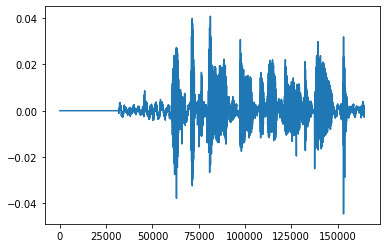

In [78]:
from IPython.display import Audio
import soundfile as sf
from matplotlib.pylab import plot
noisy_speech, srate = sf.read('audio/noisy.wav')
plot(noisy_speech)
print('Noisy speech')
Audio(noisy_speech, rate=srate) 

Denoised speech


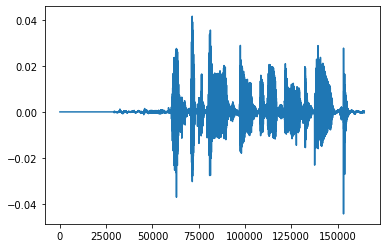

In [79]:
from IPython.display import Audio
import soundfile as sf
from matplotlib.pylab import plot
denoised_speech, srate = sf.read('audio/denoised.wav')
plot(denoised_speech)
print('Denoised speech')
Audio(denoised_speech, rate=srate)  